<CENTER><h1>Searching for the Higgs boson in the H&#8594;&gamma;&gamma; channel</h1></CENTER>

## C++ notebook example

In [1]:
#include <TChain.h>
#include <vector>
#include <TFile.h>
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
TString path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/";

In [3]:
TChain *file = new TChain("mini");

file->AddFile(path+"Data/data_A.GamGam.root");
file->AddFile(path+"Data/data_B.GamGam.root");
file->AddFile(path+"Data/data_C.GamGam.root");
file->AddFile(path+"Data/data_D.GamGam.root");

In [4]:
TCanvas *canvas = new TCanvas();

In [5]:
//TTree *tree = (TTree*) file->Get("mini");
int nentries = (Int_t)file->GetEntries();
cout << nentries << endl;

7798424


In [6]:
UInt_t  photon_n = -1;  //number of preselected photons

vector<float>   *photon_pt;  //transverse momentum of the photon
vector<float>   *photon_eta = 0;  //pseudorapidity of the photon
vector<float>   *photon_phi = 0;  //azimuthal angle of the photon
vector<float>   *photon_E   = 0;  //energy of the photon
vector<bool>    *photon_isTightID = 0;

Bool_t          TrigP = 0;
vector<float>   *photon_ptcone30 = 0;
vector<float>   *photon_etcone20 = 0;

In [7]:
file->SetBranchAddress("photon_pt",        &photon_pt);  
file->SetBranchAddress("photon_n",         &photon_n);  
file->SetBranchAddress("photon_eta",       &photon_eta);
file->SetBranchAddress("photon_phi",       &photon_phi);
file->SetBranchAddress("photon_E",         &photon_E);
file->SetBranchAddress("photon_isTightID", &photon_isTightID);
file->SetBranchAddress("trigP",            &TrigP);
file->SetBranchAddress("photon_ptcone30",  &photon_ptcone30);
file->SetBranchAddress("photon_etcone20",  &photon_etcone20);

In [8]:
TH1F *hist = new TH1F("h_M_Hyy","Diphoton invariant mass ; Invariant Mass m_{yy} [GeV] ; Events",30,105,160);

In [9]:
TLorentzVector Photon_1 = TLorentzVector();
TLorentzVector Photon_2 = TLorentzVector();

int nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = file->GetEntry(ii);
    if(TrigP)
    {
        vector <int> goodphoton_index = {0, 0, 0, 0, 0};
        int goodphoton_n = 0;
        int photon_index = 0;
        
        for (unsigned jj=0; jj<photon_n; jj++)
        {
            if(photon_isTightID->at(jj))
            {
                if((photon_pt->at(jj) > 25000) && (TMath::Abs(photon_eta->at(jj)) < 2.37) && ((TMath::Abs(photon_eta->at(jj)) < 1.37) || (TMath::Abs(photon_eta->at(jj)) > 1.52)))
                {
                    goodphoton_n += 1;
                    goodphoton_index[photon_index] = jj;
                    photon_index += 1;
                    //end Pt and eta pre-selection
                // end on request of quality of the photon
             // end looping photons in the current event
                }    
            }
        }
        
        // Using the two selected photons
        if(goodphoton_n == 2)
        {
            int goodphoton1_index = goodphoton_index[0];
            int goodphoton2_index = goodphoton_index[1];
            // Getting couple of photons with good isolation 
            if((photon_ptcone30->at(goodphoton1_index)/photon_pt->at(goodphoton1_index) < 0.065) && (photon_etcone20->at(goodphoton1_index)/photon_pt->at(goodphoton1_index) < 0.065))
            {
                if((photon_ptcone30->at(goodphoton2_index)/photon_pt->at(goodphoton2_index) < 0.065) && (photon_etcone20->at(goodphoton2_index)/photon_pt->at(goodphoton2_index) < 0.065))
                {
                    Photon_1.SetPtEtaPhiE(photon_pt->at(goodphoton1_index)/1000.0, photon_eta->at(goodphoton1_index), photon_phi->at(goodphoton1_index), photon_E->at(goodphoton1_index)/1000.0);
                    Photon_2.SetPtEtaPhiE(photon_pt->at(goodphoton2_index)/1000.0, photon_eta->at(goodphoton2_index), photon_phi->at(goodphoton2_index), photon_E->at(goodphoton2_index)/1000.0);
                    // Adding the two TLorentz vectors
                    TLorentzVector Photon_12 = TLorentzVector();
                    Photon_12 = Photon_1 + Photon_2;
                    // Filling with the mass of the gamma-gamma system
                    hist->Fill(Photon_12.M());
                }
            }
        }
    }
}

In [10]:
hist->SetFillStyle(3001);
hist->SetFillColorAlpha(kBlue, 0.5);
hist->Draw();

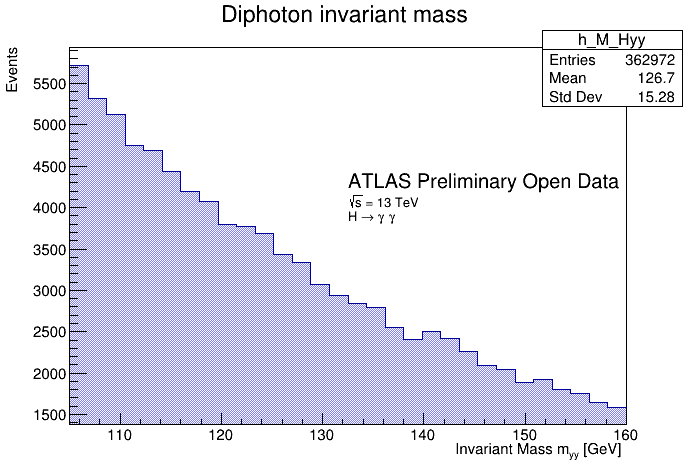

In [11]:
TLatex l;
l.SetNDC();
l.SetTextFont(42);
l.SetTextColor(kBlack);
l.SetTextSize(0.045);  
l.DrawLatex(0.50,0.6,"ATLAS Preliminary Open Data");

TLatex o;
o.SetNDC();
o.SetTextFont(42);
o.SetTextColor(kBlack);
o.SetTextSize(0.03);
double dely = 0.04; 
o.DrawLatex(0.50,0.6-dely, Form("#sqrt{s} = 13 TeV"));
o.DrawLatex(0.50,0.57-dely, Form("H #rightarrow #gamma #gamma"));

canvas->Draw();

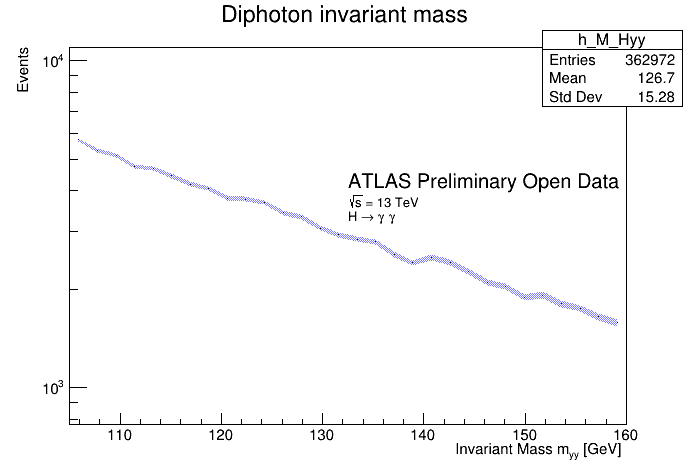

In [12]:
hist->Draw("E3");
l.DrawLatex(0.50,0.6,"ATLAS Preliminary Open Data");
o.DrawLatex(0.50,0.6-dely, Form("#sqrt{s} = 13 TeV"));
o.DrawLatex(0.50,0.57-dely, Form("H #rightarrow #gamma #gamma"));
canvas->SetLogy();
canvas->Draw();